In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
!pip install torch torchvision torchaudio

In [2]:
# Membuat dummy data
X, y = make_classification(
    n_samples=1000,    # Jumlah data
    n_features=10,     # Jumlah fitur
    n_informative=5,   # Fitur yang relevan untuk klasifikasi
    n_redundant=2,     # Fitur yang redundant (kombinasi linier dari fitur lain)
    n_classes=2,       # Jumlah kelas (binary classification)
    random_state=42    # Agar hasil dapat direproduksi
)

# Mengubah ke DataFrame untuk visualisasi
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['label'] = y

print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1.125100   1.178124   0.493516   0.790880  -0.614278   1.347020   
1  -0.564641   3.638629  -1.522415  -1.541705   1.616697   4.781310   
2   0.516313   2.165426  -0.628486  -0.386923   0.492518   1.442381   
3   0.537282   0.966618  -0.115420   0.670755  -0.958516   0.871440   
4   0.278385   1.065828  -1.724917  -2.235667   0.715107   0.731249   

   feature_6  feature_7  feature_8  feature_9  label  
0   1.419515   1.357325   0.966041  -1.981139      1  
1   3.190292  -0.890254   1.438826  -3.828748      0  
2   1.332905  -1.958175  -0.348803  -1.804124      0  
3   0.508186  -1.034471  -1.654176  -1.910503      1  
4  -0.674119   0.598330  -0.524283   1.047610      0  


In [3]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(16, activation='relu'),                                  # Hidden layer 2
    Dense(1, activation='sigmoid')                                # Output layer (binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6251 - loss: 0.6565 - val_accuracy: 0.6850 - val_loss: 0.6044
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7491 - loss: 0.5869 - val_accuracy: 0.8250 - val_loss: 0.5369
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8197 - loss: 0.5132 - val_accuracy: 0.8400 - val_loss: 0.4715
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8498 - loss: 0.4537 - val_accuracy: 0.8600 - val_loss: 0.4171
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8690 - loss: 0.4202 - val_accuracy: 0.8750 - val_loss: 0.3734
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8839 - loss: 0.3822 - val_accuracy: 0.8950 - val_loss: 0.3379
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8876 - loss: 0.3400 - val_accuracy: 0.8950 - val_loss: 0.3112
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8972 - loss: 0.2965 - val_accuracy: 0.9050 - val_lo

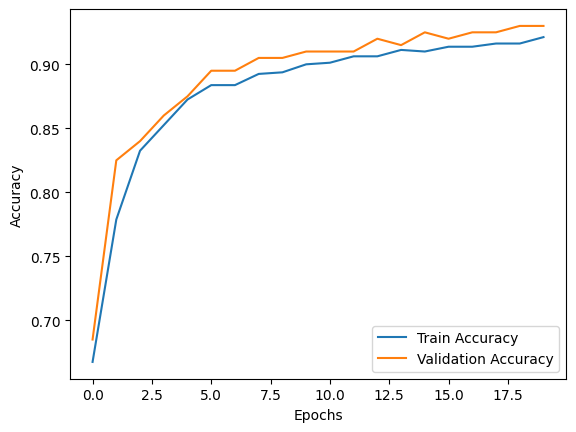

In [4]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# MEMBUAT DATA DUMMY
# Penjelasan: Membuat dataset untuk binary classification dengan 10 fitur.
X, y = make_classification(
    n_samples=1000,    # Jumlah sampel: 1000
    n_features=10,     # Jumlah fitur: 10
    n_informative=5,   # Fitur yang relevan: 5
    n_redundant=2,     # Fitur redundant: 2
    n_classes=2,       # Klasifikasi biner
    random_state=42    # Untuk memastikan hasil konsisten
)

In [9]:
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi data ke format tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [12]:
# DEFINISI MODEL MLP
# Penjelasan: Membuat model MLP dengan jumlah hidden layer dan neuron yang dapat disesuaikan.
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, activation_function):
        super(MLP, self).__init__()
        layers = []
        prev_size = input_size

        # Membuat hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            if activation_function == "relu":
                layers.append(nn.ReLU())
            elif activation_function == "sigmoid":
                layers.append(nn.Sigmoid())
            elif activation_function == "tanh":
                layers.append(nn.Tanh())
            prev_size = hidden_size

        # Output layer (binary classification)
        layers.append(nn.Linear(prev_size, 2)) # Output 2 karena binary classification
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [13]:
# FUNGSI TRAINING
# Penjelasan: Fungsi untuk melatih model dan mencatat akurasi pada data train dan test.
def train_model(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs, batch_size):
    train_loader = torch.utils.data.DataLoader(
        dataset=list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True
    )

    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Evaluasi akurasi pada train dan test
        model.eval()
        with torch.no_grad():
            train_outputs = model(X_train)
            test_outputs = model(X_test)

            train_pred = torch.argmax(train_outputs, dim=1)
            test_pred = torch.argmax(test_outputs, dim=1)

            train_acc = (train_pred == y_train).sum().item() / len(y_train)
            test_acc = (test_pred == y_test).sum().item() / len(y_test)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

In [15]:
# EXPERIMENTAL LOOP
# Penjelasan: Melakukan eksperimen dengan berbagai kombinasi hyperparameter.
hidden_layer_options = [[32], [32, 16], [32, 16, 8]]  # Jumlah hidden layers dan neuron
activation_functions = ["relu", "sigmoid", "tanh"]
epoch_options = [1, 10, 25, 50, 100, 250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512]

results = []  # Menyimpan hasil eksperimen
import torch.optim as optim # Import the torch.optim module and alias it as 'optim'

for hidden_layers in hidden_layer_options:
    for activation_function in activation_functions:
        for epochs in epoch_options:
            for learning_rate in learning_rates:
                for batch_size in batch_sizes:
                    print(f"Training with HL={hidden_layers}, AF={activation_function}, EP={epochs}, LR={learning_rate}, BS={batch_size}")

                    # Membuat model baru
                    model = MLP(input_size=10, hidden_sizes=hidden_layers, activation_function=activation_function)
                    criterion = nn.CrossEntropyLoss()  # Loss function untuk klasifikasi
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Now 'optim' is recognized

                    # Train model
                    train_acc, test_acc = train_model(
                        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs, batch_size
                    )

                    # Simpan hasil
                    results.append({
                        "hidden_layers": hidden_layers,
                        "activation_function": activation_function,
                        "epochs": epochs,
                        "learning_rate": learning_rate,
                        "batch_size": batch_size,
                        "train_accuracy": train_acc[-1],
                        "test_accuracy": test_acc[-1]
                    })

# KONVERSI HASIL KE DATAFRAME UNTUK ANALISIS
results_df = pd.DataFrame(results)

Training with HL=[32], AF=relu, EP=1, LR=10, BS=16
Training with HL=[32], AF=relu, EP=1, LR=10, BS=32
Training with HL=[32], AF=relu, EP=1, LR=10, BS=64
Training with HL=[32], AF=relu, EP=1, LR=10, BS=128
Training with HL=[32], AF=relu, EP=1, LR=10, BS=256
Training with HL=[32], AF=relu, EP=1, LR=10, BS=512
Training with HL=[32], AF=relu, EP=1, LR=1, BS=16
Training with HL=[32], AF=relu, EP=1, LR=1, BS=32
Training with HL=[32], AF=relu, EP=1, LR=1, BS=64
Training with HL=[32], AF=relu, EP=1, LR=1, BS=128
Training with HL=[32], AF=relu, EP=1, LR=1, BS=256
Training with HL=[32], AF=relu, EP=1, LR=1, BS=512
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=16
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=32
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=64
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=128
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=256
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=512
Training with HL=[32], AF=relu, EP=1, LR=0.01, BS=16
Training with HL=[32

In [16]:
# TAMPILKAN 10 HASIL TERBAIK BERDASARKAN TEST ACCURACY
print("\nTop 10 Results")
print(results_df.sort_values(by="test_accuracy", ascending=False).head(10))


Top 10 Results
     hidden_layers activation_function  epochs  learning_rate  batch_size  \
740       [32, 16]                relu      25          0.010          64   
1423   [32, 16, 8]                relu      50          0.010          32   
1466   [32, 16, 8]                relu     100          0.001          64   
845       [32, 16]                relu     250          0.100         512   
1384   [32, 16, 8]                relu      25          0.100         256   
1638   [32, 16, 8]             sigmoid      50          0.010          16   
1815   [32, 16, 8]                tanh      25          0.100         128   
777       [32, 16]                relu      50          0.010         128   
817       [32, 16]                relu     100          0.001          32   
779       [32, 16]                relu      50          0.010         512   

      train_accuracy  test_accuracy  
740          0.97375          0.985  
1423         0.99750          0.985  
1466         0.98375  

In [17]:
results_df

,hidden_layers,activation_function,epochs,learning_rate,batch_size,train_accuracy,test_accuracy
0,[32],relu,1,10.0000,16,0.74500,0.755
1,[32],relu,1,10.0000,32,0.74375,0.805
2,[32],relu,1,10.0000,64,0.79625,0.765
3,[32],relu,1,10.0000,128,0.82375,0.850
4,[32],relu,1,10.0000,256,0.69500,0.700
...,...,...,...,...,...,...,...
1939,"[32, 16, 8]",tanh,250,0.0001,32,0.90250,0.925
1940,"[32, 16, 8]",tanh,250,0.0001,64,0.85750,0.855
1941,"[32, 16, 8]",tanh,250,0.0001,128,0.85000,0.855
1942,"[32, 16, 8]",tanh,250,0.0001,256,0.83625,0.845


In [18]:
# prompt: Using dataframe results_df: convert to a csv

# Convert the dataframe to a csv file.
results_df.to_csv('results.csv', index=False) # Save to 'results.csv', without the index.